We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [64]:
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-05-22 12:38:36--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.223.117, 13.227.223.78, 13.227.223.89, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.223.117|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [65]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [66]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-22,22,5,2020,531,6,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-05-21,21,5,2020,492,9,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-05-20,20,5,2020,581,5,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-05-19,19,5,2020,408,4,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-05-18,18,5,2020,262,1,Afghanistan,AF,AFG,37172386.0,Asia
5,2020-05-17,17,5,2020,0,0,Afghanistan,AF,AFG,37172386.0,Asia
6,2020-05-16,16,5,2020,1063,32,Afghanistan,AF,AFG,37172386.0,Asia
7,2020-05-15,15,5,2020,113,6,Afghanistan,AF,AFG,37172386.0,Asia
8,2020-05-14,14,5,2020,259,3,Afghanistan,AF,AFG,37172386.0,Asia
9,2020-05-13,13,5,2020,280,5,Afghanistan,AF,AFG,37172386.0,Asia


Last check of our source dataframe.

In [67]:
df.count()

dateRep                    18621
day                        18621
month                      18621
year                       18621
cases                      18621
deaths                     18621
countriesAndTerritories    18621
geoId                      18621
countryterritoryCode       18437
popData2018                18375
continentExp               18621
dtype: int64

We pivot to a country by column format.

In [68]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo

cases                                                         ...  \
geoId         AD     AE     AF   AG   AI    AL     AM   AO     AR    AT  ...   
dateRep                                                                  ...   
2019-12-31   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-01   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-02   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-03   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-04   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
...          ...    ...    ...  ...  ...   ...    ...  ...    ...   ...  ...   
2020-05-18   0.0  731.0  262.0  0.0  0.0  13.0  189.0  0.0    0.0  14.0  ...   
2020-05-19   0.0  832.0  408.0  0.0  0.0   2.0  351.0  0.0  566.0  25.0  ...   
2020-05-20   0.0  873.0  581.0  0.0  0.0   1.0  218.0  2.0  438.0  78.0  ...   
2020-05-21   1.0  941.0  492.0  0.0  0.0  15.0  230.0  2.0  474.0  18.0  ...   
2020-05-22   0.0  894.0  531.0  0.0  0.0   5.0  335.0  6.0  648.0  57.0  ...   

           deaths                                                
geoId          VC   VE   VG   VI   VN   XK   YE    ZA   ZM   ZW  
dateRep                                                          
2019-12-31    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-01    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-02    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-03    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-04    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
...           ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  
2020-05-18    0.0  0.0  0.0  0.0  0.0  0.0  1.0   3.0  0.0  0.0  
2020-05-19    0.0  0.0  0.0  0.0  0.0  0.0  0.0  22.0  0.0  0.0  
2020-05-20    0.0  0.0  0.0  0.0  0.0  0.0  8.0  26.0  0.0  0.0  
2020-05-21    0.0  0.0  0.0  0.0  0.0  0.0  1.0  27.0  0.0  0.0  
2020-05-22    0.0  0.0  0.0  0.0  0.0  0.0  4.0  30.0  0.0  0.0  

[144 rows x 420 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we use the current range and add six months and check our latest date.

In [69]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... deaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VC  VE  VG   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...    ...  ..  ..   
2021-05-18   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-05-19   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-05-20   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-05-21   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-05-22   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  
...         ..  ...  ..  ..  ..  ..  ..  
2021-05-18 NaN  NaN NaN NaN NaN NaN NaN  
2021-05-19 NaN  NaN NaN NaN NaN NaN NaN  
2021-05-20 NaN  NaN NaN NaN NaN NaN NaN  
2021-05-21 NaN  NaN NaN NaN NaN NaN NaN  
2021-05-22 NaN  NaN NaN NaN NaN NaN NaN  

[509 rows x 420 columns]

Most algorithms take numerical data as inputs for a model, so we add a column representing the date as days since the earliest date in the dataframe.

In [70]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    509.00000
mean     254.00000
std      147.07991
min        0.00000
25%      127.00000
50%      254.00000
75%      381.00000
max      508.00000
Name: daynum, dtype: float64

In [71]:
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

JP Res  0.097 at 100% of   16353 start 2020-03-31 peak 2020-04-15 floor 2020-05-12 beta 11.498 mu 105.315
RU Res  0.020 at  40% of  731666 start 2020-03-29 peak 2020-05-17 floor 2020-09-28 beta 25.109 mu 137.842
US Res  0.365 at  86% of 1747876 start 2020-03-12 peak 2020-04-17 floor 2020-07-30 beta 18.088 mu 107.830
BR Res  0.055 at  12% of 2128492 start 2020-03-24 peak 2020-06-24 floor 2021-02-26 beta 45.810 mu 175.114
AT Res  4.352 at  99% of   16288 start 2020-03-04 peak 2020-03-27 floor 2020-05-26 beta 11.895 mu  86.359
CH Res  0.182 at  99% of   30735 start 2020-03-05 peak 2020-03-27 floor 2020-05-31 beta 11.125 mu  86.888
DE Res  0.361 at  98% of  179634 start 2020-03-07 peak 2020-04-02 floor 2020-06-10 beta 13.547 mu  92.150
IT Res  0.079 at  95% of  236962 start 2020-02-26 peak 2020-03-30 floor 2020-06-30 beta 16.752 mu  89.305
ES Res  0.453 at  98% of  236164 start 2020-03-03 peak 2020-03-30 floor 2020-06-16 beta 12.996 mu  89.376
PT Res  0.487 at  95% of   30616 start 2020-03

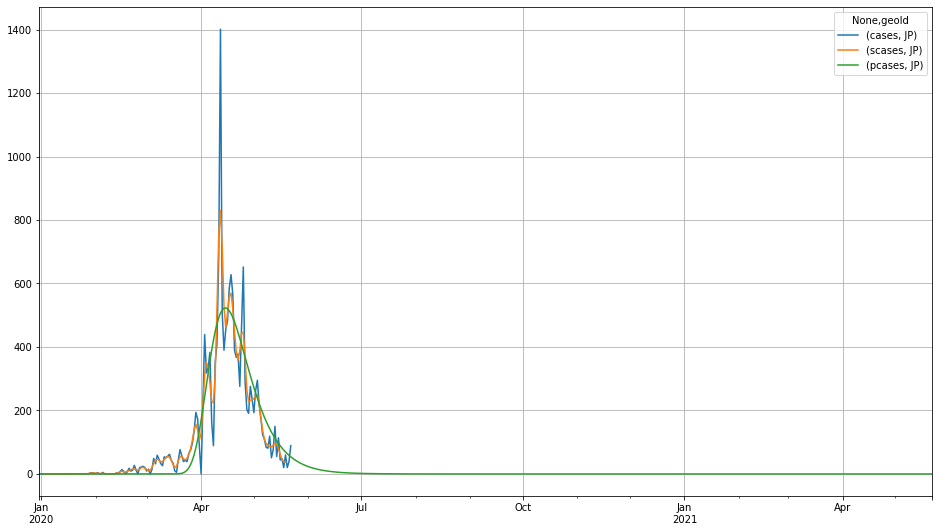

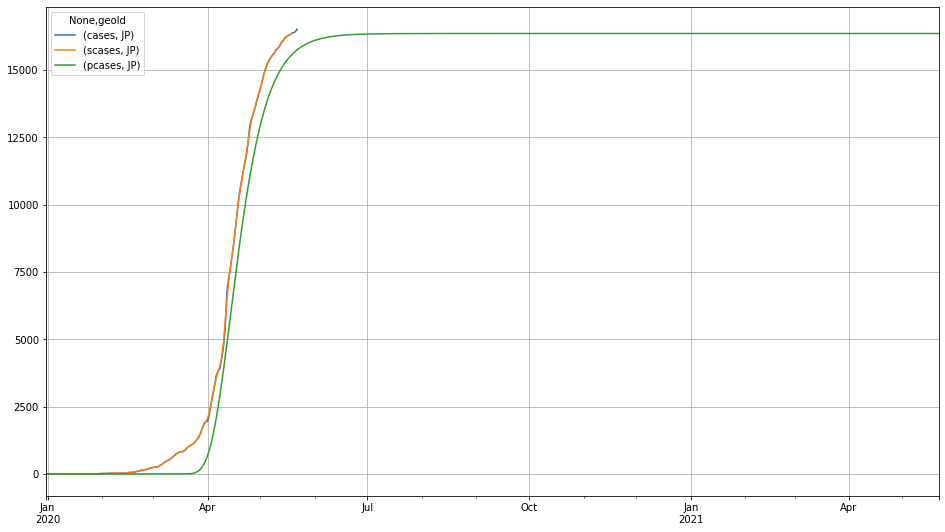

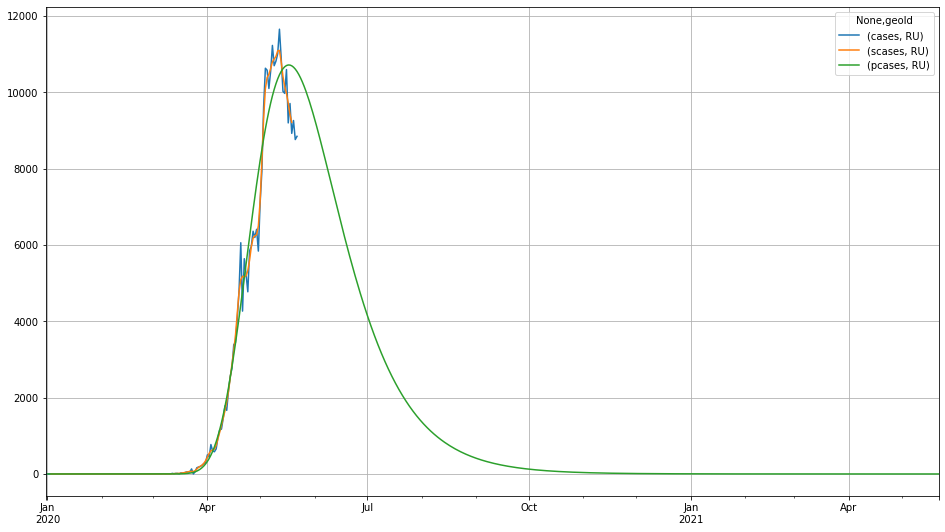

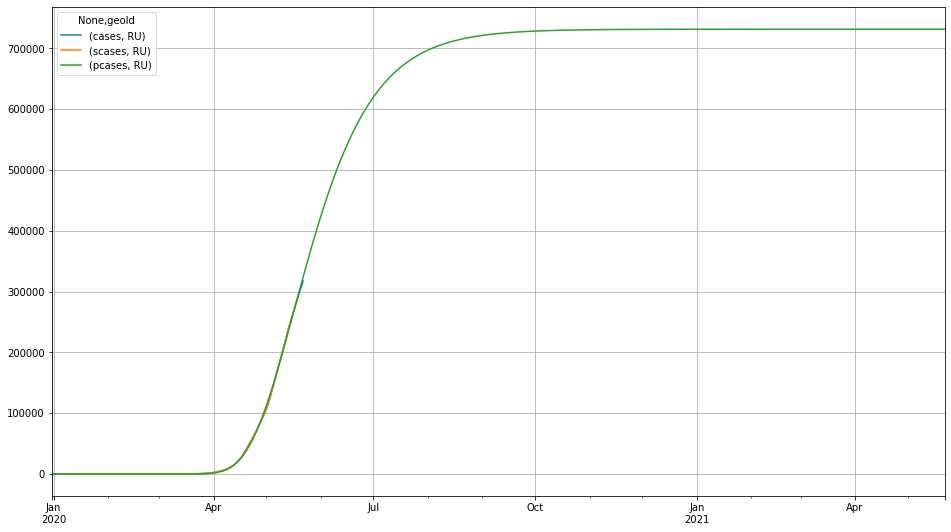

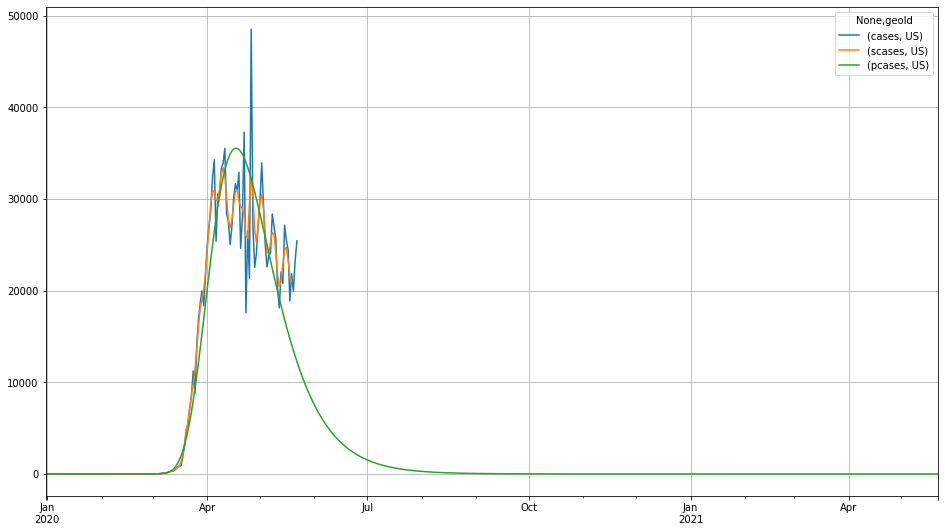

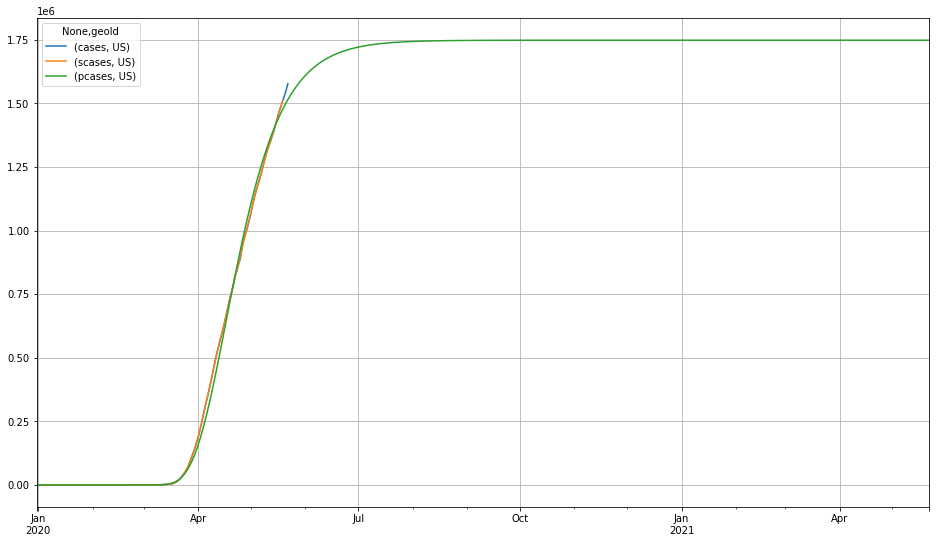

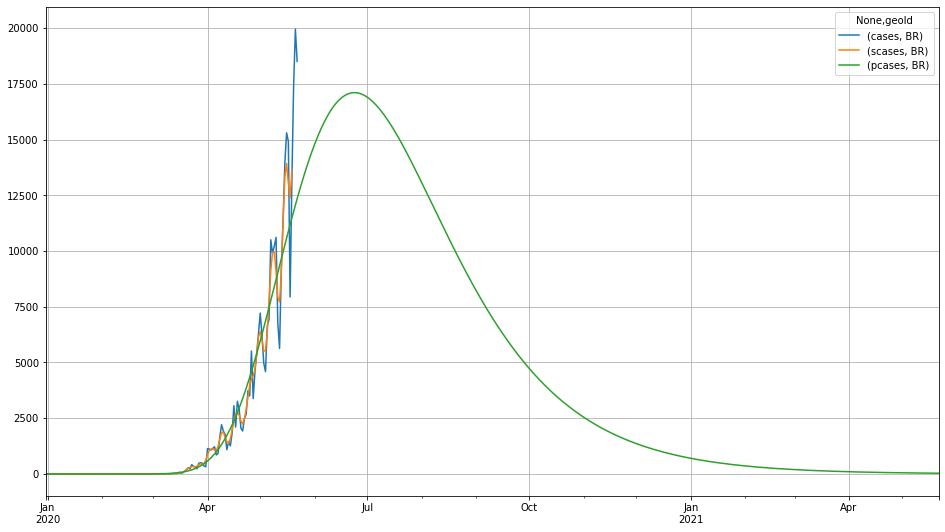

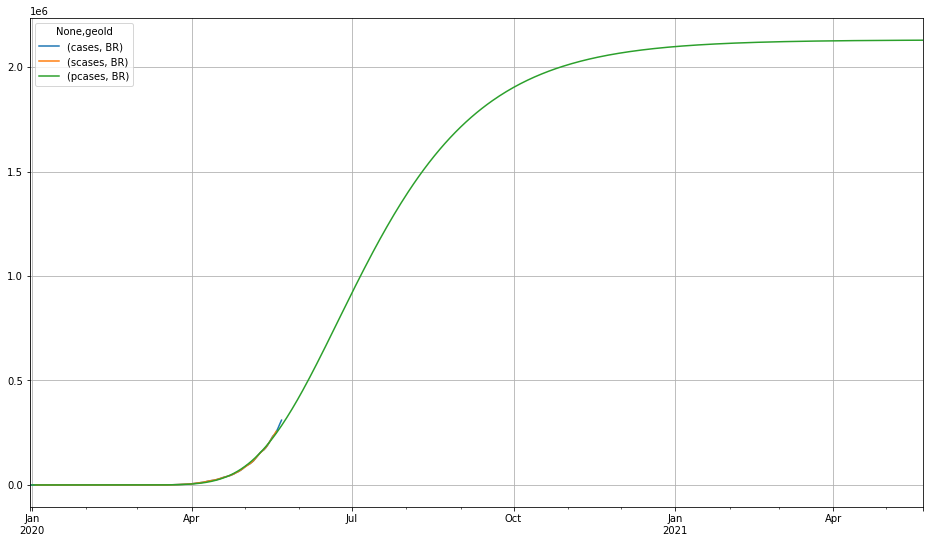

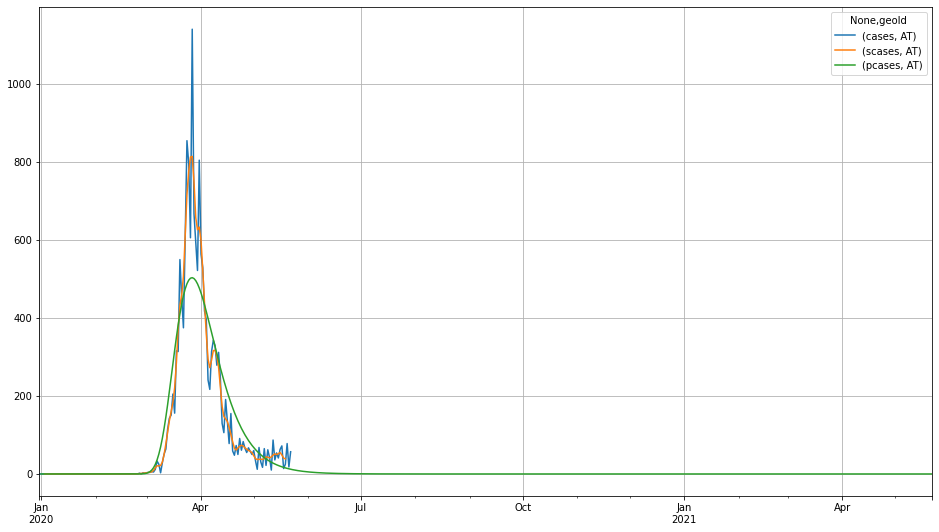

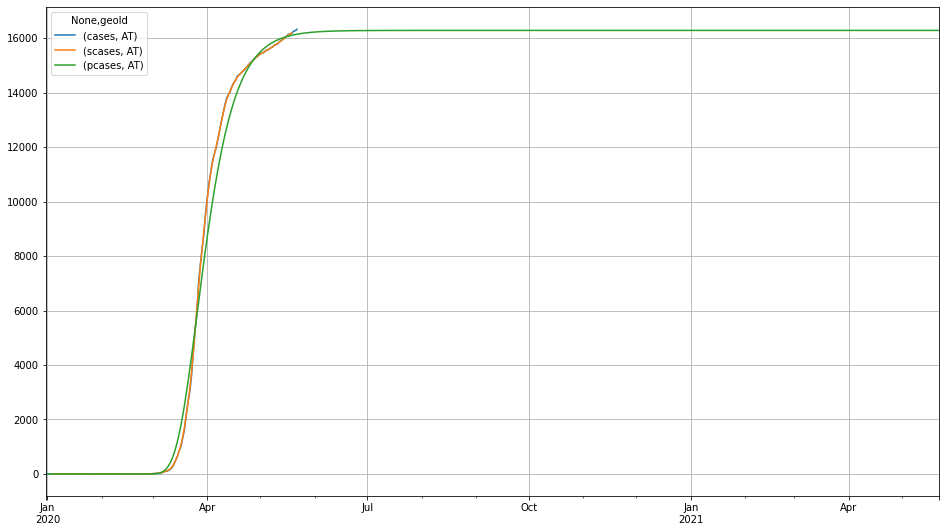

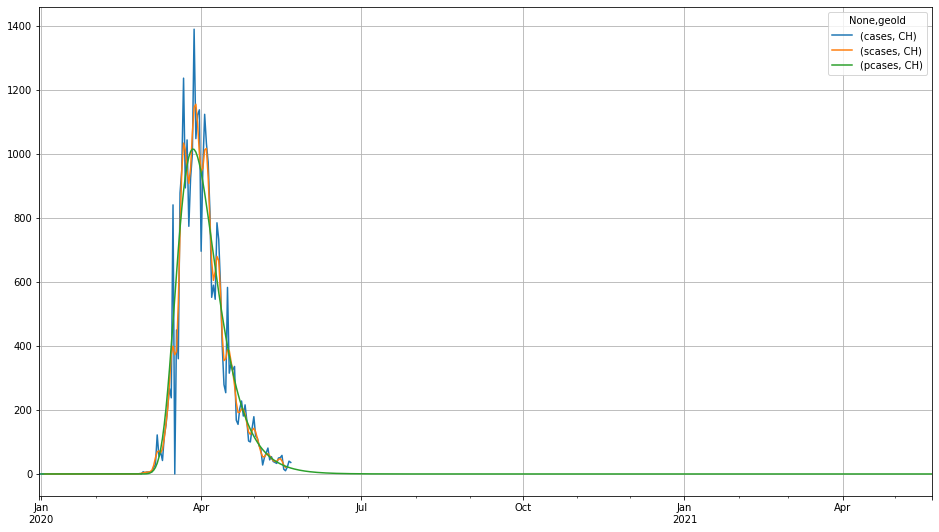

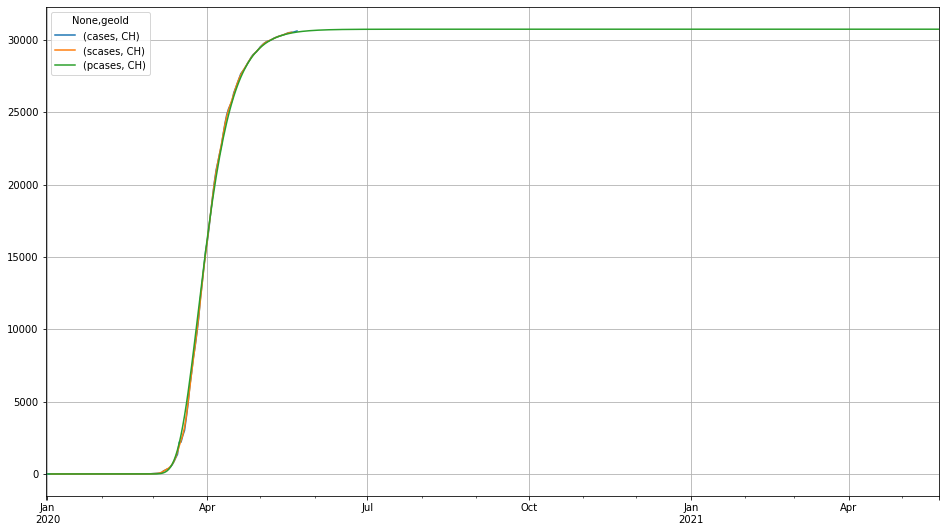

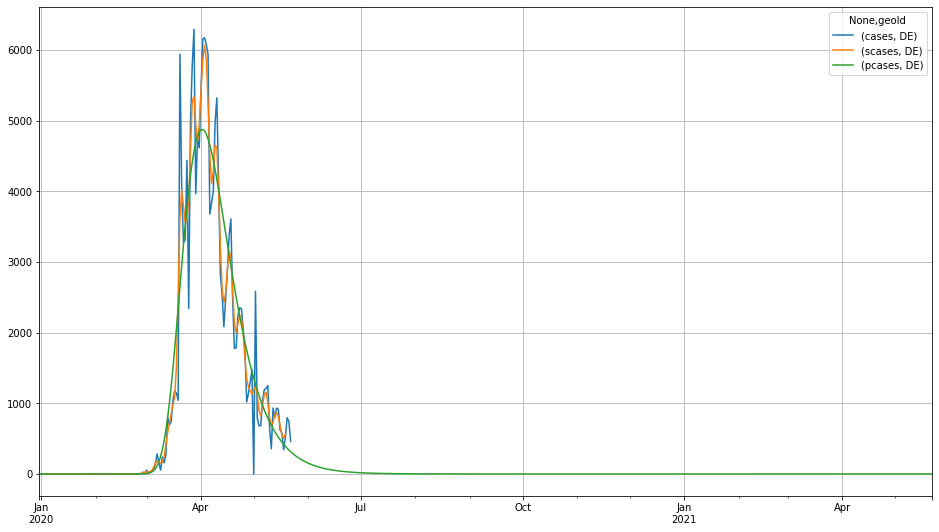

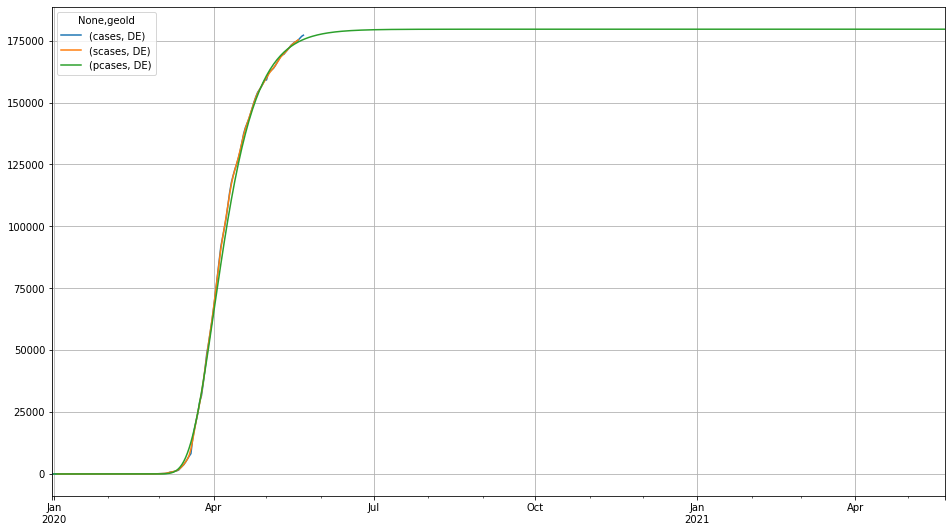

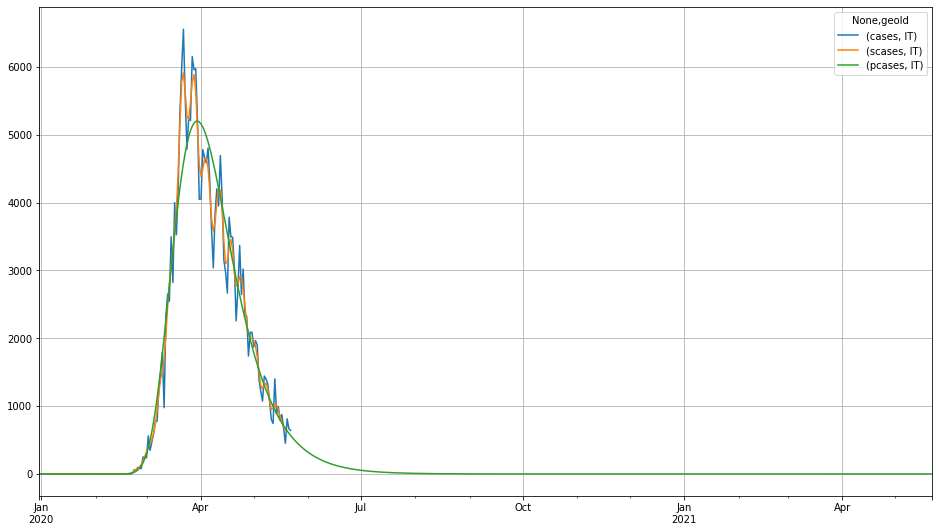

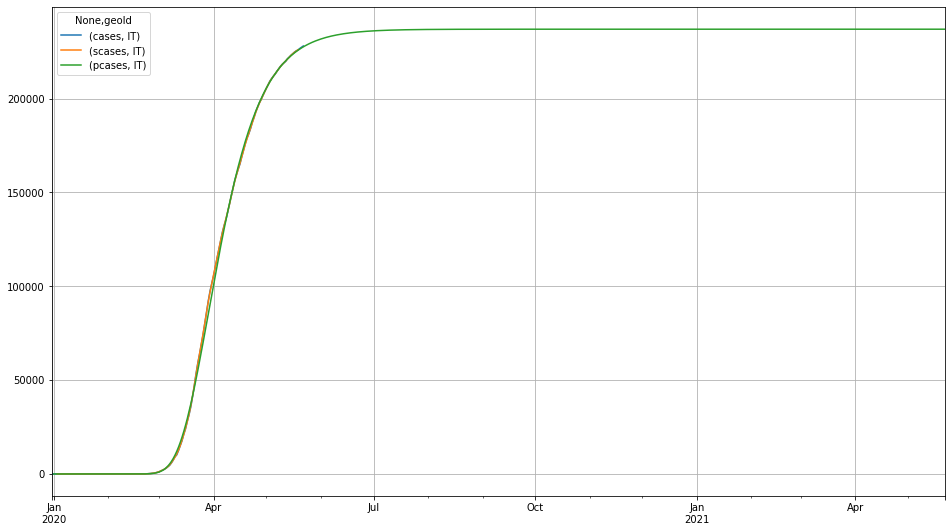

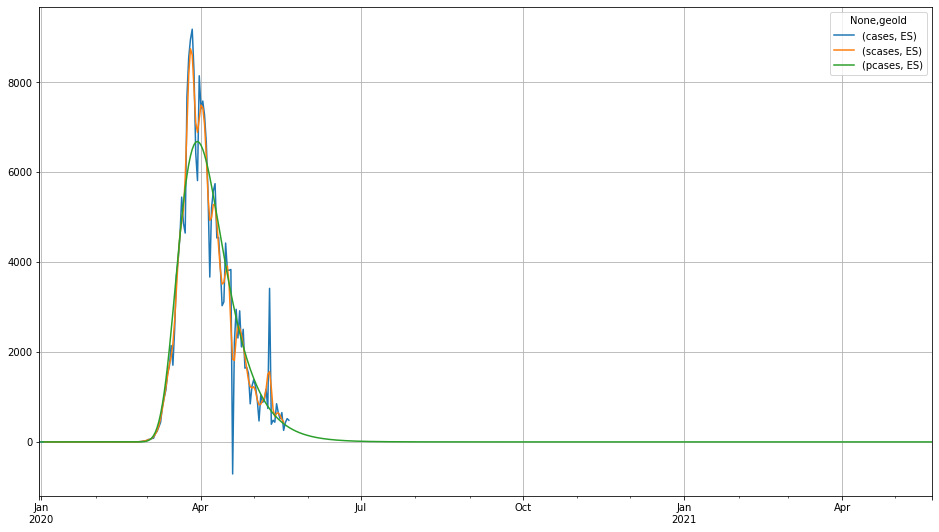

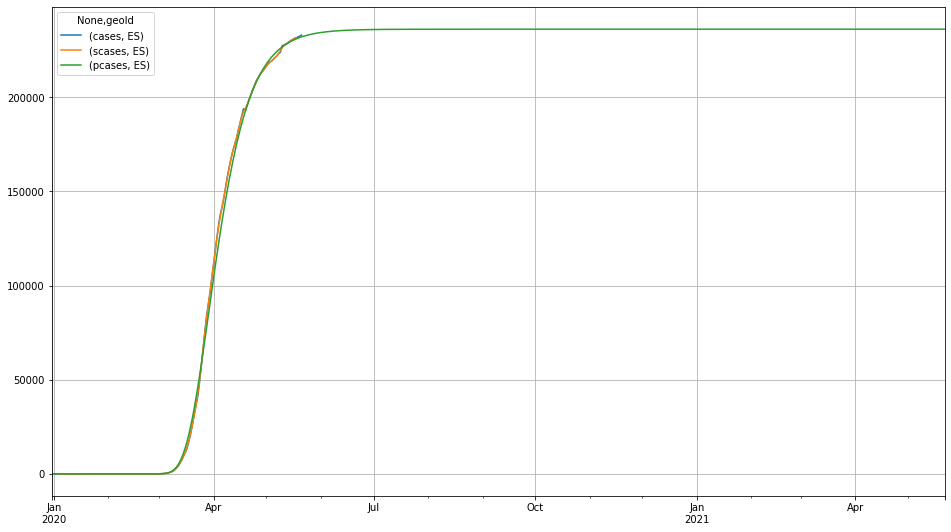

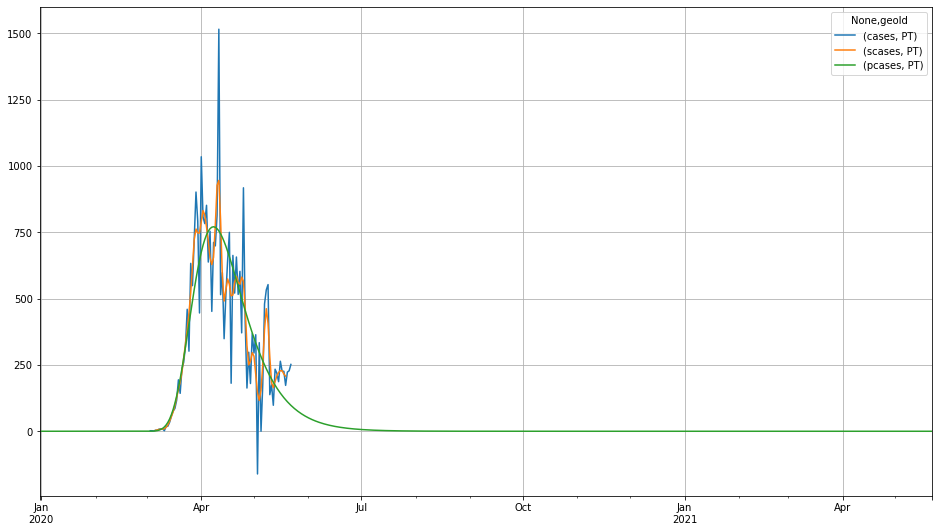

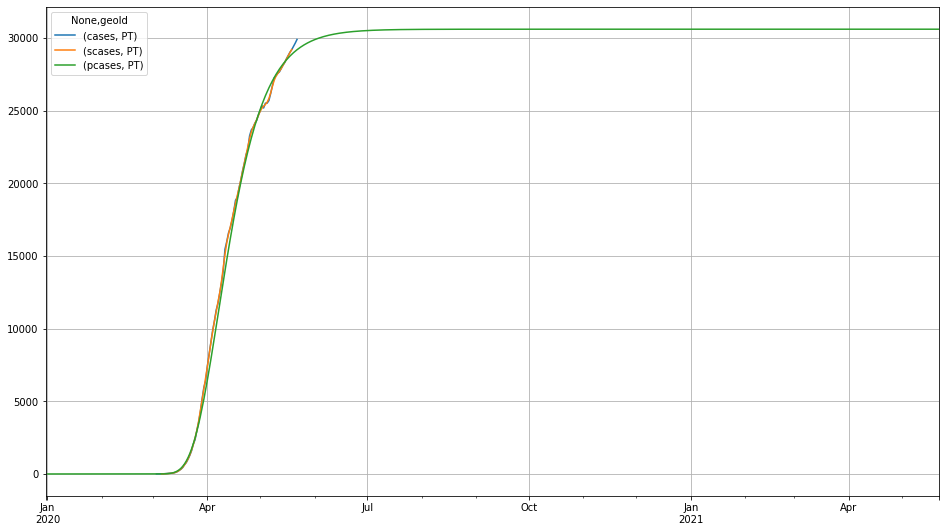

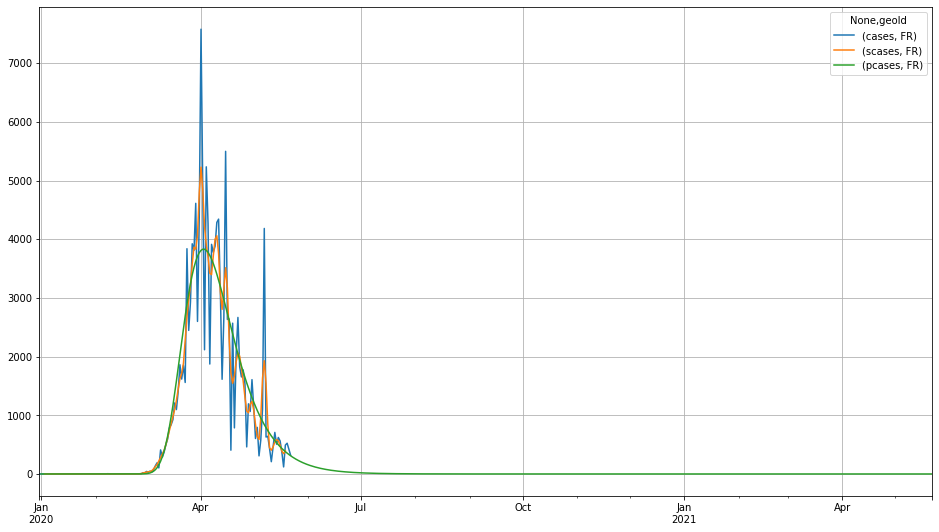

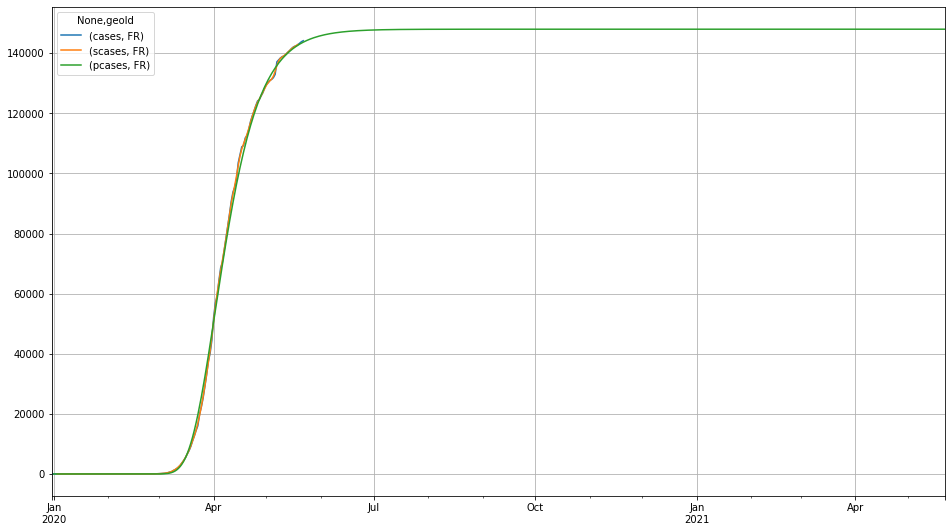

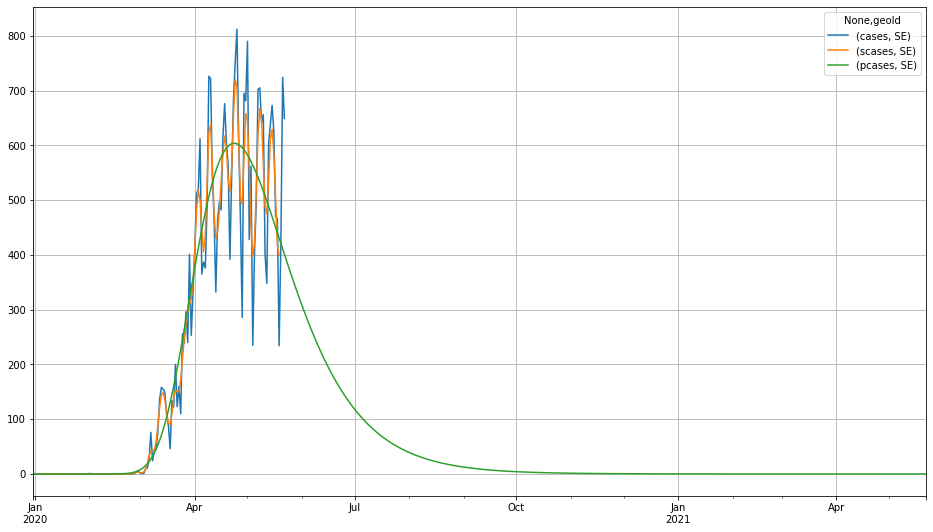

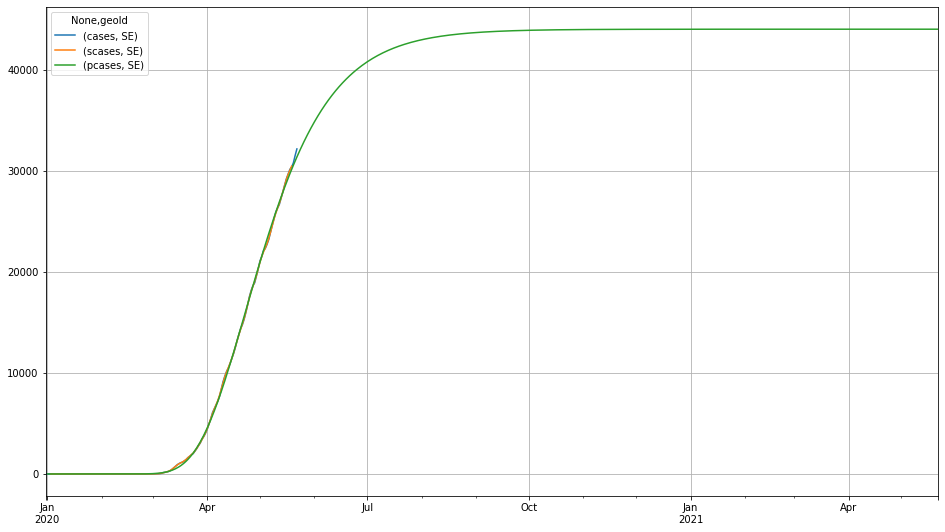

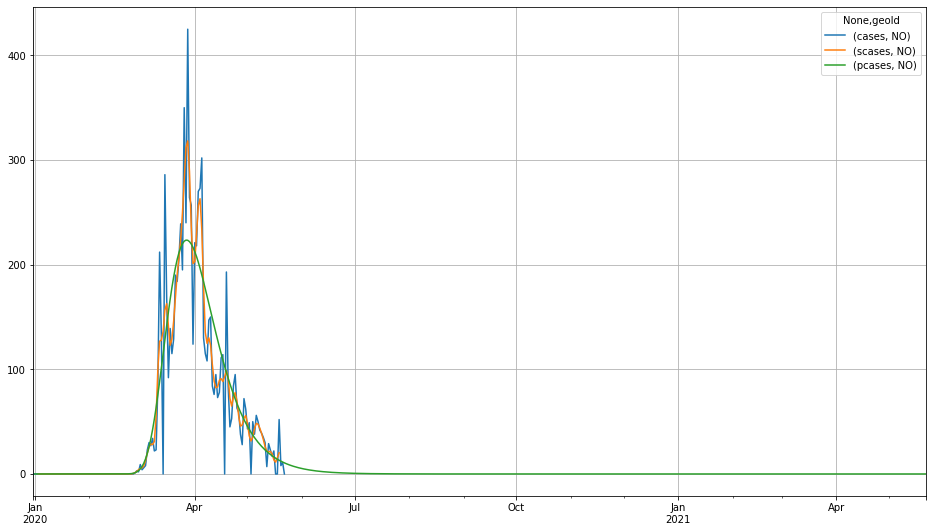

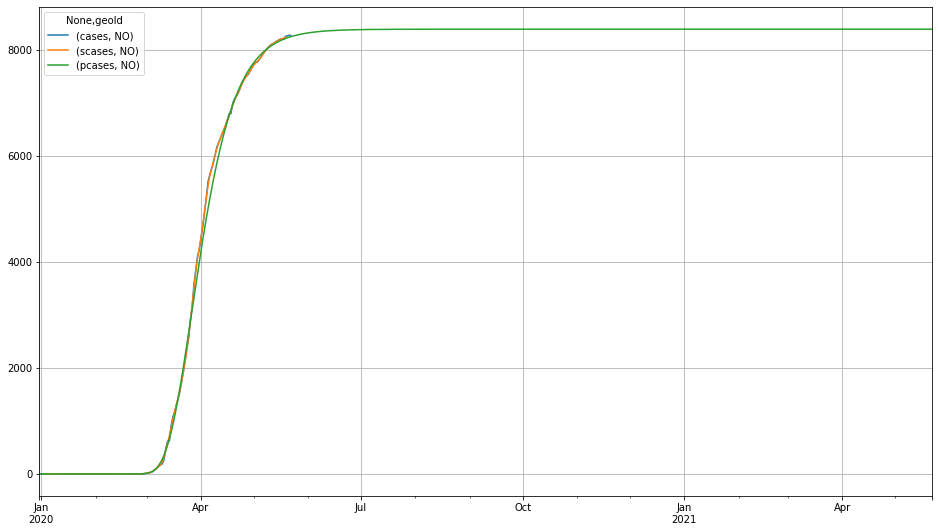

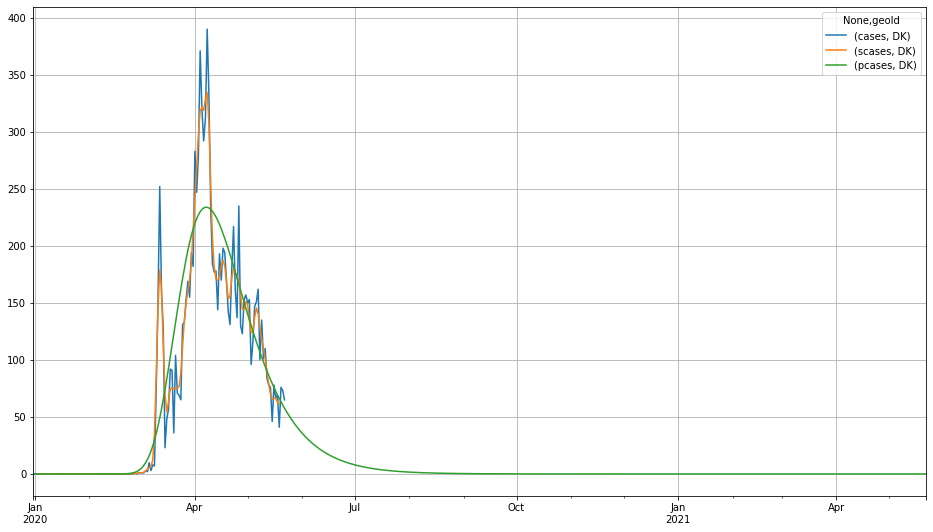

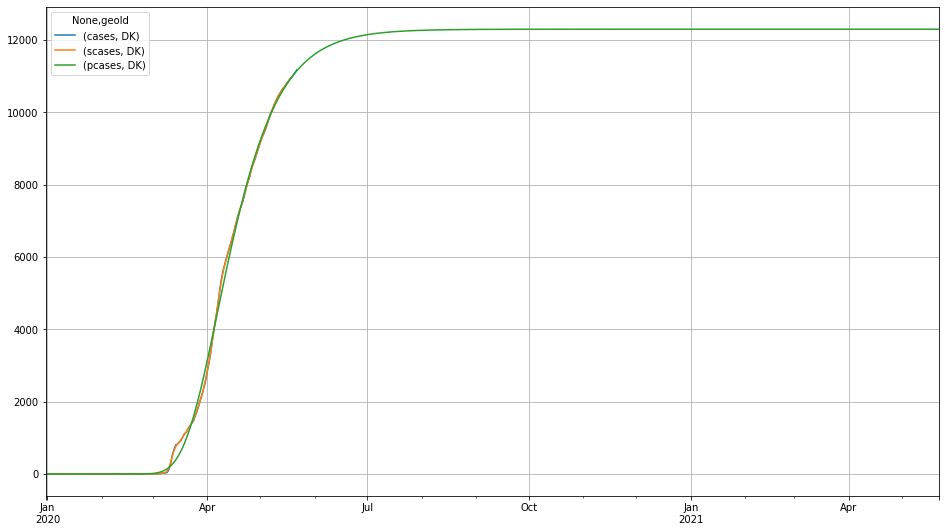

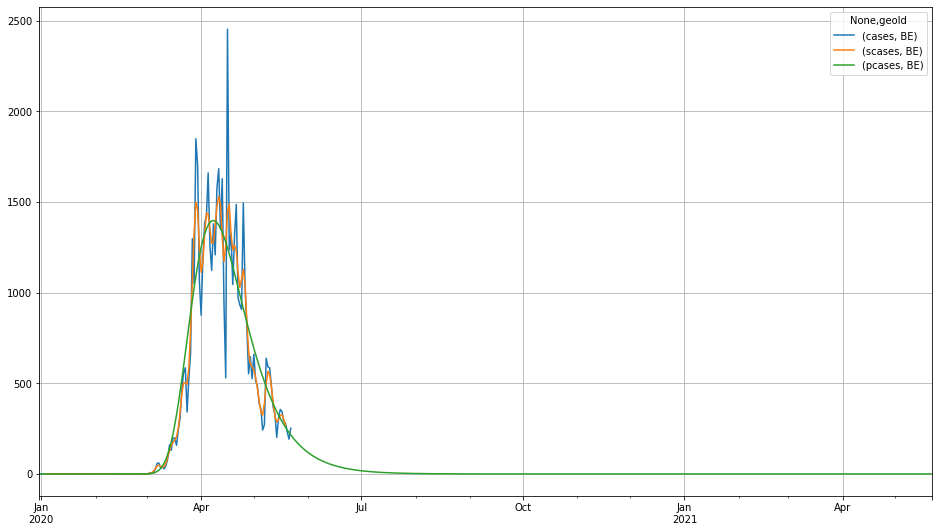

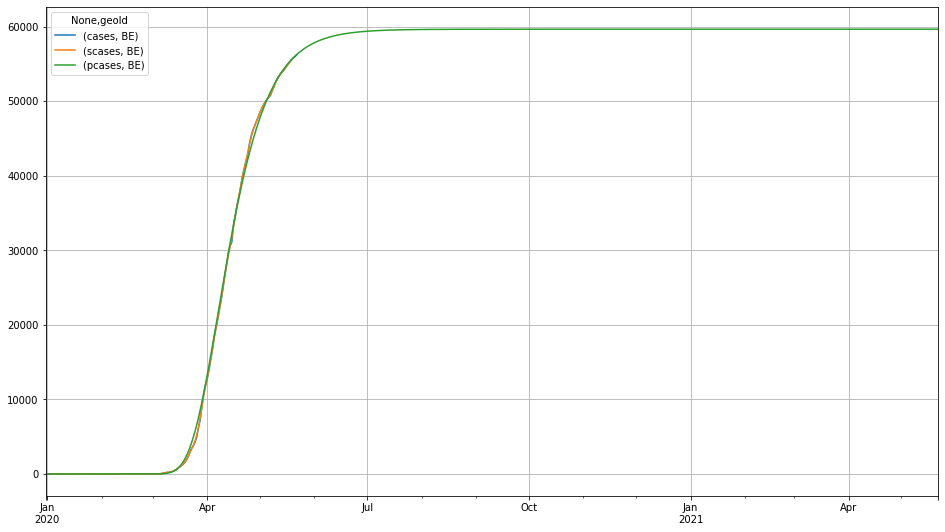

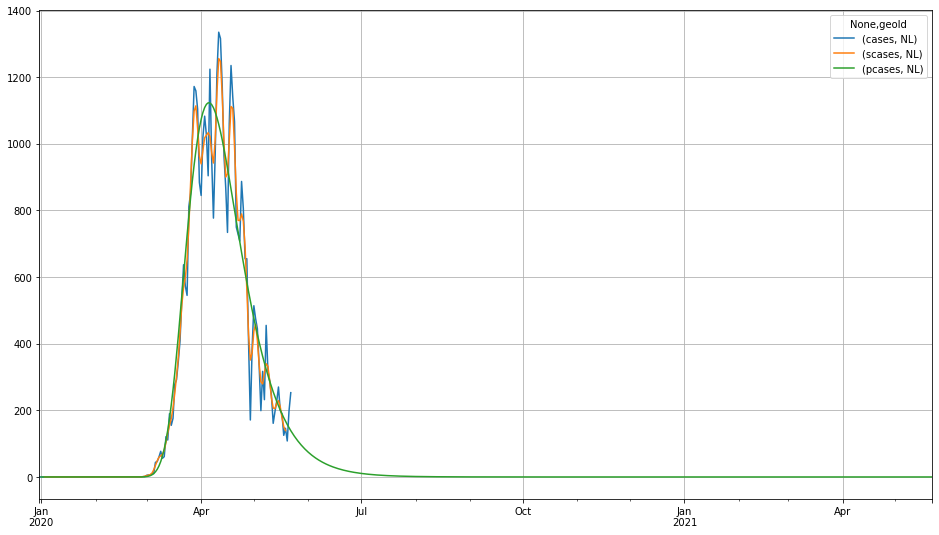

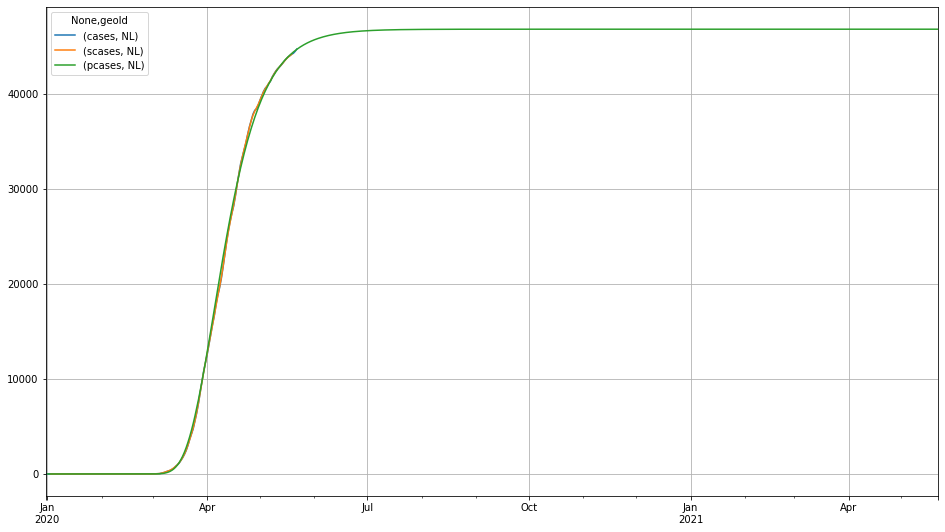

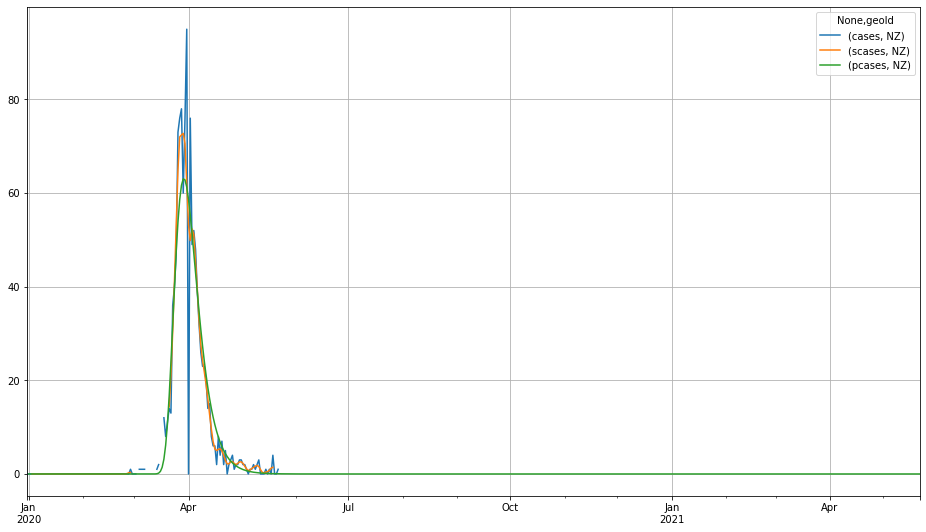

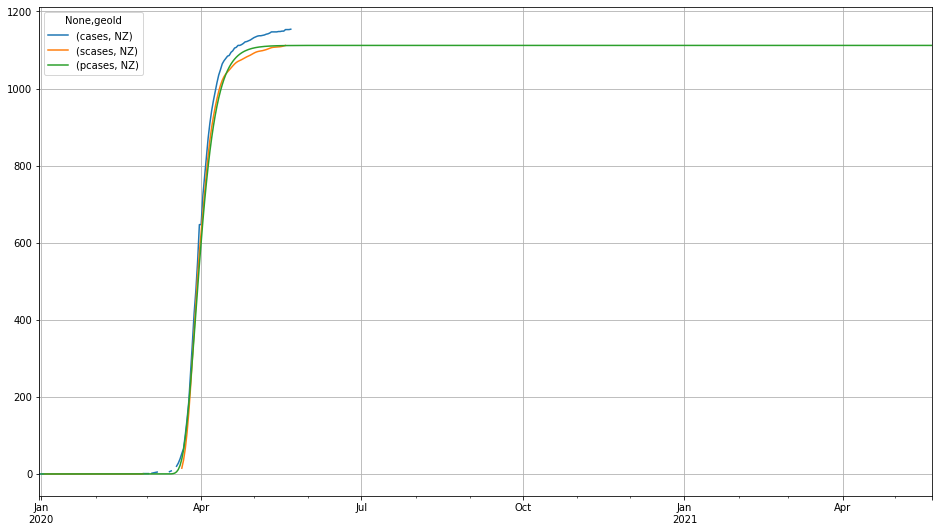

In [72]:
#countries = np.sort(df['geoId'].unique())
countries = ['JP', 'RU', 'US', 'BR', 'AT', 'CH', 'DE', 'IT', 'ES', 'PT', 'FR', 'SE', 'NO', 'DK', 'BE', 'NL', 'NZ']

df_out = pd.DataFrame({
    'res':np.nan,\
    'progress':np.nan,\
    'final':np.nan,\
    'start':np.nan,\
    'peak':np.nan,\
    'floor':np.nan,\
    'beta':np.nan,\
    'mu':np.nan},\
    index=countries)

measure  = 'cases'
pmeasure = 'pcases'
smeasure = 'scases'

def fitres(progress):
    global df_pred, fit
    
    df_pred['scaled'] = df_pred['cumul'] / maxcases * progress
    df_pred = df_pred[df_pred['scaled'] < 1]
    
    if len(df_pred) > 4:
        df_pred['linear'] = - np.log(- np.log(df_pred['scaled']))
        fit = np.polyfit(x=df_pred['daynum'], y=df_pred['linear'], deg=1, full=True)
        return(fit[1][0])
    else:
        return 99    

from scipy.optimize import minimize

for country in countries:
    df_geo[(smeasure, country)] = df_geo[measure][country].rolling(
        7, win_type='hann', center=True).mean()
    df_pred = pd.DataFrame(
        {'daynum':df_geo['daynum'], measure:df_geo[smeasure][country]})
    
    popdata = df[df['geoId'] == country]['popData2018'].iloc[0]
    mincases = popdata / 1e6
    maxcases = df_pred[measure].cumsum().max()
    df_pred = df_pred[df_pred[measure] > mincases]
    
    if len(df_pred) > 0:
        df_pred['cumul'] = df_pred[measure].cumsum()
        
        optim = minimize(fitres, 1, method='SLSQP', bounds=[(0.1, 1)])
        progress = optim.x[0]
        
        df_geo[(pmeasure, country)] = np.exp(- np.exp(- np.polyval(
            fit[0], df_geo['daynum']))) * maxcases / progress
        df_geo[(pmeasure, country)] = df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()
        
        slope = fit[0][0]
        intercept = fit[0][1]
        beta = 1 / slope
        mu = - intercept * beta
        
        peak = df_geo[(df_geo[(pmeasure, country)] > df_geo[(pmeasure, country)].shift(-1))].index.min()
        floor = df_geo[(df_geo[(pmeasure, country)] < (popdata / 1e6)) & (
            df_geo[(pmeasure, country)].index > peak)].index.min()
        start = df_geo[(df_geo[(pmeasure, country)] > (popdata / 1e6)) & (
            df_geo[(pmeasure, country)].index < peak)].index.min()
        final = df_geo[pmeasure][country].cumsum().max()
        
        df_out.loc[country] = [optim.fun, progress, final, start.date(), peak.date(), floor.date(), beta, mu]
        print('{} Res {:6.3f} at {:3.0f}% of {:7.0f} start {} peak {} floor {} beta {:6.3f} mu {:7.3f}'.format(
            country, optim.fun, progress * 100, final, start.date(), peak.date(), floor.date(), beta, mu))
        
        df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].plot(
            figsize=(16, 9), grid=True)
        df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].cumsum().plot(
            figsize=(16, 9), grid=True)

Write out the values per country.

In [73]:
df_out.index.name = 'country'
df_out.to_csv("zzprogress.csv")

In [74]:
df_out

,res,progress,final,start,peak,floor,beta,mu
country,,,,,,,,
JP,0.097240,1.000000,1.635325e+04,2020-03-31,2020-04-15,2020-05-12,11.497808,105.315285
RU,0.020178,0.397328,7.316658e+05,2020-03-29,2020-05-17,2020-09-28,25.108845,137.841581
US,0.365407,0.862957,1.747876e+06,2020-03-12,2020-04-17,2020-07-30,18.087913,107.830019
BR,0.055311,0.120491,2.128492e+06,2020-03-24,2020-06-24,2021-02-26,45.810117,175.113914
AT,4.352332,0.994425,1.628781e+04,2020-03-04,2020-03-27,2020-05-26,11.895337,86.358560
CH,0.182191,0.993010,3.073458e+04,2020-03-05,2020-03-27,2020-05-31,11.125427,86.887925
DE,0.360949,0.976087,1.796338e+05,2020-03-07,2020-04-02,2020-06-10,13.546782,92.150042
IT,0.079405,0.953764,2.369620e+05,2020-02-26,2020-03-30,2020-06-30,16.752216,89.304760
ES,0.452956,0.980898,2.361644e+05,2020-03-03,2020-03-30,2020-06-16,12.996046,89.375663


Keep exploring! Stay home, wash your hands, keep your distance.